 Learn a robot to navigate a maze or an environment with obstacles to reach a goal.

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [6]:
size = 5
goal = (4,4)
obs = [(1,1),(2,2),(3,1)]
Q = np.zeros((size,size,4))
lr, discount, explore, episodes = 0.15, 0.85, 0.25, 600

In [7]:
def reward(pos):
    if pos == goal: return 20
    if pos in obs: return -15
    return -1

def move(pos, act):
    i,j = pos
    if act==0 and i>0: i-=1
    elif act==1 and i<size-1: i+=1
    elif act==2 and j>0: j-=1
    elif act==3 and j<size-1: j+=1
    return (i,j)

In [8]:
for _ in range(episodes):
    state = (0,0)
    while state != goal and state not in obs:
        act = random.choice([0,1,2,3]) if random.random()<explore else np.argmax(Q[state[0],state[1],:])
        nextS = move(state, act)
        Q[state[0],state[1],act] += lr*(reward(nextS)+discount*np.max(Q[nextS[0],nextS[1],:])-Q[state[0],state[1],act])
        state = nextS

In [9]:
state, path = (0,0), [(0,0)]
while state != goal and len(path)<25:
    state = move(state, np.argmax(Q[state[0],state[1],:]))
    path.append(state)

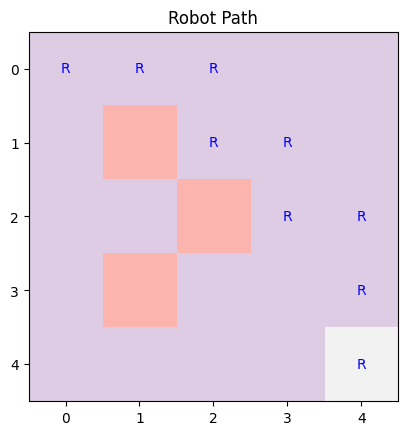

In [10]:
grid = np.zeros((size,size))
for o in obs: grid[o[0],o[1]]=-1
grid[goal[0],goal[1]]=2
plt.imshow(grid, cmap='Pastel1', origin='upper')
for p in path: plt.text(p[1], p[0], 'R', ha='center', va='center', color='blue')
plt.title("Robot Path"); plt.show()